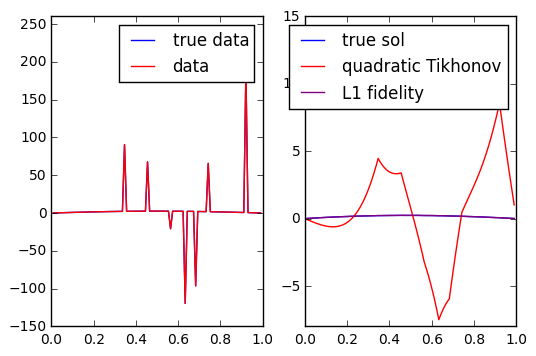

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt




delta = 0.05
alpha = 1
n = 100
x = np.arange(1,n+1) / (n+1)
y = x

# set up matrix describing forward problem
XX , YY = np.meshgrid(x,y)
K = np.minimum(XX * (1-YY),YY*(1-XX))

# exact solution
f = np.sin(x)*(1-x)

# exact data
g = K.dot(f)

# noise data
gdelta = g
for j in np.arange(7):
    #rand_index = np.floor(np.random.rand(1)*n).astype(int)
    rand_index = np.random.randint(n) 
    gdelta[rand_index] = gdelta[rand_index] + n * np.random.randn(1)

fal = scipy.linalg.solve(K.transpose().dot(K) + alpha*np.eye(n) , K.transpose().dot(gdelta) )

fal2 = fal
# INSERT YOUR CODE HERE !!!
#
A = K.transpose().dot(K)
initial_guess = 0*f
C = np.reshape(np.array([ [np.eye(n)] , [-np.eye(n)] ]),[2*n,n])
bineq = (1/alpha)*np.ones(2*n)
cons = ({'type':'ineq', 'fun':lambda x: C.dot(x)+bineq})
res = scipy.optimize.minimize(lambda z: 1/2 * z.transpose().dot(A.dot(z)) - gdelta.dot(z), initial_guess,constraints=cons)
p = res.x
fal2 = K.transpose().dot(p)



    
plt.subplot(121)
plt.plot(x,g,label="true data", color="blue")
plt.plot(x,gdelta,label="data", color="red")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax*1.3)
plt.legend()

plt.subplot(122)
plt.plot(x,f,label="true sol", color="blue")
plt.plot(x,fal,label="quadratic Tikhonov", color="red")
plt.plot(x,fal2,label="L1 fidelity", color="purple")
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax*1.5)
plt.legend()
plt.show()




